<h4>I used Claude, Anthropic's model to help with the code portion of this assignment.</h4>
<h4>I used Copilot for help understanding these concepts.</h4>

<p>(1) Collect data on two variables for a simple linear regression that you believe have a linear relationship and may violate the homoscedasticity and/or no autocorrelation assumption. Create a scatter plot of the data. Comment on whether the scatter plot indicates an issues of heteroscedasticity or autocorrelation. Estimate the parameters of the linear regression model using OLS and some type of GLS. Compare and contrast the results. </p>

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy import stats
import seaborn as sns
import pandas as pd
import csv
import glob

In [27]:
#todo   2014_2015_income

# Load the entire sheet
df = pd.read_csv('../datasets/2014_2015_income.csv', encoding='ISO-8859-1', header=None)  # header=None keeps all rows as raw data

# Select rows 30 to 37 (Python uses 0-based indexing, so this is rows 29 to 36)
subset_df = df.iloc[29:37]
subset_df = subset_df.reset_index(drop=True)

# Now you can work with subset_df as your dataset
print(subset_df)


                           0       1       2      3       4       5      6   \
0          Age of Householder     NaN     NaN    NaN     NaN     NaN    NaN   
1      Under 65 years.  94,640  60,531    443  94,820  63,344    822   
2       15 to 24 years   6,370  34,645  1,297   6,361  36,108  1,333   
3       25 to 34 years  20,075  54,305  1,316  20,047  57,366  1,121   
4       35 to 44 years  21,121  66,770  1,025  21,222  71,417    958   
5       45 to 54 years  23,566  70,913  1,365  23,294  73,857  1,867   
6       55 to 64 years  23,509  60,649  1,126  23,896  62,802  1,471   
7  65 years and older...  29,946  36,938    585  30,998  38,515    772   

     7     8   9   10  11  12  13  
0   NaN   NaN NaN NaN NaN NaN NaN  
1  *4.6  1.53 NaN NaN NaN NaN NaN  
2   4.2  5.41 NaN NaN NaN NaN NaN  
3  *5.6  2.98 NaN NaN NaN NaN NaN  
4  *7.0  2.01 NaN NaN NaN NaN NaN  
5  *4.2  3.23 NaN NaN NaN NaN NaN  
6  *3.5  2.84 NaN NaN NaN NaN NaN  


In [28]:
#todo   2014_2015_income

# Load the entire sheet
df = pd.read_csv('../datasets/2018_2019_income.csv', encoding='ISO-8859-1', header=None)  # header=None keeps all rows as raw data

# Select rows 30 to 37 (Python uses 0-based indexing, so this is rows 29 to 36)
subset_df = df.iloc[22:30]
subset_df = subset_df.reset_index(drop=True)

# Now you can work with subset_df as your dataset
print(subset_df)


                    0       1       2      3       4       5      6     7  \
0  Age of Householder     NaN     NaN    NaN     NaN     NaN    NaN   NaN   
1      Under 65 years  94,423  72,958    584  93,524  77,873  1,151  *6.7   
2   ...15 to 24 years   6,199  44,320  2,738   5,406  47,934  2,132  *8.2   
3   ...25 to 34 years  20,611  67,084  1,095  20,424  70,283  1,406  *4.8   
4   ...35 to 44 years  21,370  82,206  1,090  21,432  88,858  2,531  *8.1   
5   ...45 to 54 years  22,071  85,994  1,878  21,659  92,221  1,983  *7.2   
6   ...55 to 64 years  24,172  70,200  1,470  24,603  75,686  1,482  *7.8   
7  65 years and older  34,156  44,487    831  34,927  47,357    911  *6.5   

      8  
0   NaN  
1  1.58  
2  8.15  
3  2.42  
4  3.01  
5  3.17  
6  2.71  
7  2.57  


In [44]:
# 2014-2023

data = []
start_collecting = False

with open('../datasets/2014_2015_income.csv', encoding='ISO-8859-1') as f:
    reader = csv.reader(f)
    for row in reader:
        if "Age of Householder" in row[0]:
            start_collecting = True
            continue  # Skip the header row itself
        if "Nativity of Householder" in row[0]:
            break  # Stop before this row
        if start_collecting:
            data.append(row)

# Convert to DataFrame if needed
df = pd.DataFrame(data)

# Optional: reset index and assign column names manually
df.reset_index(drop=True, inplace=True)
# Drop first and last row
df_trimmed = df.iloc[1:-1].reset_index(drop=True)

# Keep only columns 0 and 2
df_filtered = df_trimmed.iloc[:, [0, 2]]

print('trimmed \n', df_trimmed)

df_filtered = df_filtered.reset_index(drop=True)

df_filtered

trimmed 
                         0       1       2      3       4       5      6   \
0    15 to 24 years   6,370  34,645  1,297   6,361  36,108  1,333   
1    25 to 34 years  20,075  54,305  1,316  20,047  57,366  1,121   
2    35 to 44 years  21,121  66,770  1,025  21,222  71,417    958   
3    45 to 54 years  23,566  70,913  1,365  23,294  73,857  1,867   
4    55 to 64 years  23,509  60,649  1,126  23,896  62,802  1,471   

     7     8  9  10 11 12 13  
0   4.2  5.41                 
1  *5.6  2.98                 
2  *7.0  2.01                 
3  *4.2  3.23                 
4  *3.5  2.84                 


,0,2
0,15 to 24 years,"34,645"
1,25 to 34 years,"54,305"
2,35 to 44 years,"66,770"
3,45 to 54 years,"70,913"
4,55 to 64 years,"60,649"


In [ ]:
import pandas as pd
import csv
import glob
import re
import os

def process_income_file(filepath: str) -> pd.DataFrame:
    """
    Process a single income CSV file and return a cleaned DataFrame
    with columns: [AgeGroup, Income, Year].
    Year is extracted from the filename (first year in range).
    """
    # Extract year from filename (e.g., "2014_2015_income.csv" → 2014)
    basename = os.path.basename(filepath)
    match = re.match(r"(\d{4})_\d{4}_income", basename)
    if match:
        year = int(match.group(1))
    else:
        raise ValueError(f"Could not parse year from filename: {basename}")

    data = []
    start_collecting = False

    with open(filepath, encoding='ISO-8859-1') as f:
        reader = csv.reader(f)
        for row in reader:
            if "Age of Householder" in row[0]:
                start_collecting = True
                continue
            if "Nativity of Householder" in row[0]:
                break
            if start_collecting:
                data.append(row)

    # Convert to DataFrame
    df = pd.DataFrame(data)

    # Drop first and last row
    df_trimmed = df.iloc[1:-1].reset_index(drop=True)

    # Keep only age group (col 0) and income (col 2)
    df_filtered = df_trimmed.iloc[:, [0, 2]].reset_index(drop=True)

    # Rename columns
    df_filtered.columns = ["AgeGroup", "Income"]

    # Convert income to numeric (remove commas, etc.)
    df_filtered["Income"] = (
        df_filtered["Income"]
        .replace({",": ""}, regex=True)
        .astype(float)
    )

    # Add year column
    df_filtered["Year"] = year

    return df_filtered


# ---- Process all datasets ----

all_data = []

# Pick up all files like "../datasets/*_income.csv"
for filepath in glob.glob("../datasets/*_income.csv"):
    df_year = process_income_file(filepath)
    all_data.append(df_year)

# Concatenate all years
df_master = pd.concat(all_data, ignore_index=True)

# Sort by Year then AgeGroup for clarity
df_master = df_master.sort_values(by=["Year", "AgeGroup"]).reset_index(drop=True)

# Example: df_master["AgeGroup"] currently has messy characters
# Keep only strings that match "number to number years"
def clean_agegroup(age_str):
    # Try to find the pattern like "15 to 24 years"
    match = re.search(r"\d{1,2}\s+to\s+\d{1,2}\s+years", age_str)
    if match:
        return match.group(0)  # keep the valid match
    else:
        return None  # drop rows that don't match

# Apply to AgeGroup column
df_master["AgeGroup"] = df_master["AgeGroup"].apply(clean_agegroup)

# Drop rows where AgeGroup became None
df_master = df_master.dropna(subset=["AgeGroup"]).reset_index(drop=True)

# Save to a single CSV
df_master.to_csv("../datasets/income_by_age_2014_2023.csv", index=False)

print(df_master.head(10))
print(df_master.tail(10))


         AgeGroup   Income  Year
0  15 to 24 years  34645.0  2014
1  25 to 34 years  54305.0  2014
2  35 to 44 years  66770.0  2014
3  45 to 54 years  70913.0  2014
4  55 to 64 years  60649.0  2014
5  15 to 24 years  36564.0  2015
6  25 to 34 years  58091.0  2015
7  35 to 44 years  72319.0  2015
8  45 to 54 years  74790.0  2015
9  55 to 64 years  63596.0  2015
          AgeGroup    Income  Year
40  15 to 24 years   54540.0  2022
41  25 to 34 years   83420.0  2022
42  35 to 44 years  100500.0  2022
43  45 to 54 years  105600.0  2022
44  55 to 64 years   84470.0  2022
45  15 to 24 years   56350.0  2023
46  25 to 34 years   88000.0  2023
47  35 to 44 years  103900.0  2023
48  45 to 54 years  113600.0  2023
49  55 to 64 years   92990.0  2023


<p>(2) A linear probability model (LPM) is a linear regression model with a binomial categorical dependent variable. Rigorously argue that all LPMs suffer from heteroscedasticity using a simulation or mathematical logic.</p>

<p>Basically, it's just normal linear regression, but my target, or y variable is a binomial categorical variable. A binomial categorical dependent variable is something like this, rent or buy, yes or no, tall or short, etc.</p>
<p>So these types of regression problems all suffer from increasing variance of the error term when X increases.</p>
<p>I will now show with a simulation why LPMs suffer from heteroscedasticity.</p>

LINEAR PROBABILITY MODEL HETEROSCEDASTICITY SIMULATION

Linear Probability Model Results:
Intercept (β₀): -0.6943
Slope (β₁): 0.0186
R²: 0.4034

Breusch-Pagan Test for Heteroscedasticity:
LM Statistic: 188.9735
P-value: 0.0000
Conclusion: Heteroscedasticity detected

Variance Analysis:
Minimum theoretical variance: -0.9961
Maximum theoretical variance: 0.2500
Variance ratio (max/min): -0.25

Why LPM suffers from heteroscedasticity:
• Error variance = p(X)[1-p(X)]
• When p(X) ≈ 0 or p(X) ≈ 1, variance is low
• When p(X) ≈ 0.5, variance is maximum (0.25)
• This creates a predictable pattern of changing variance


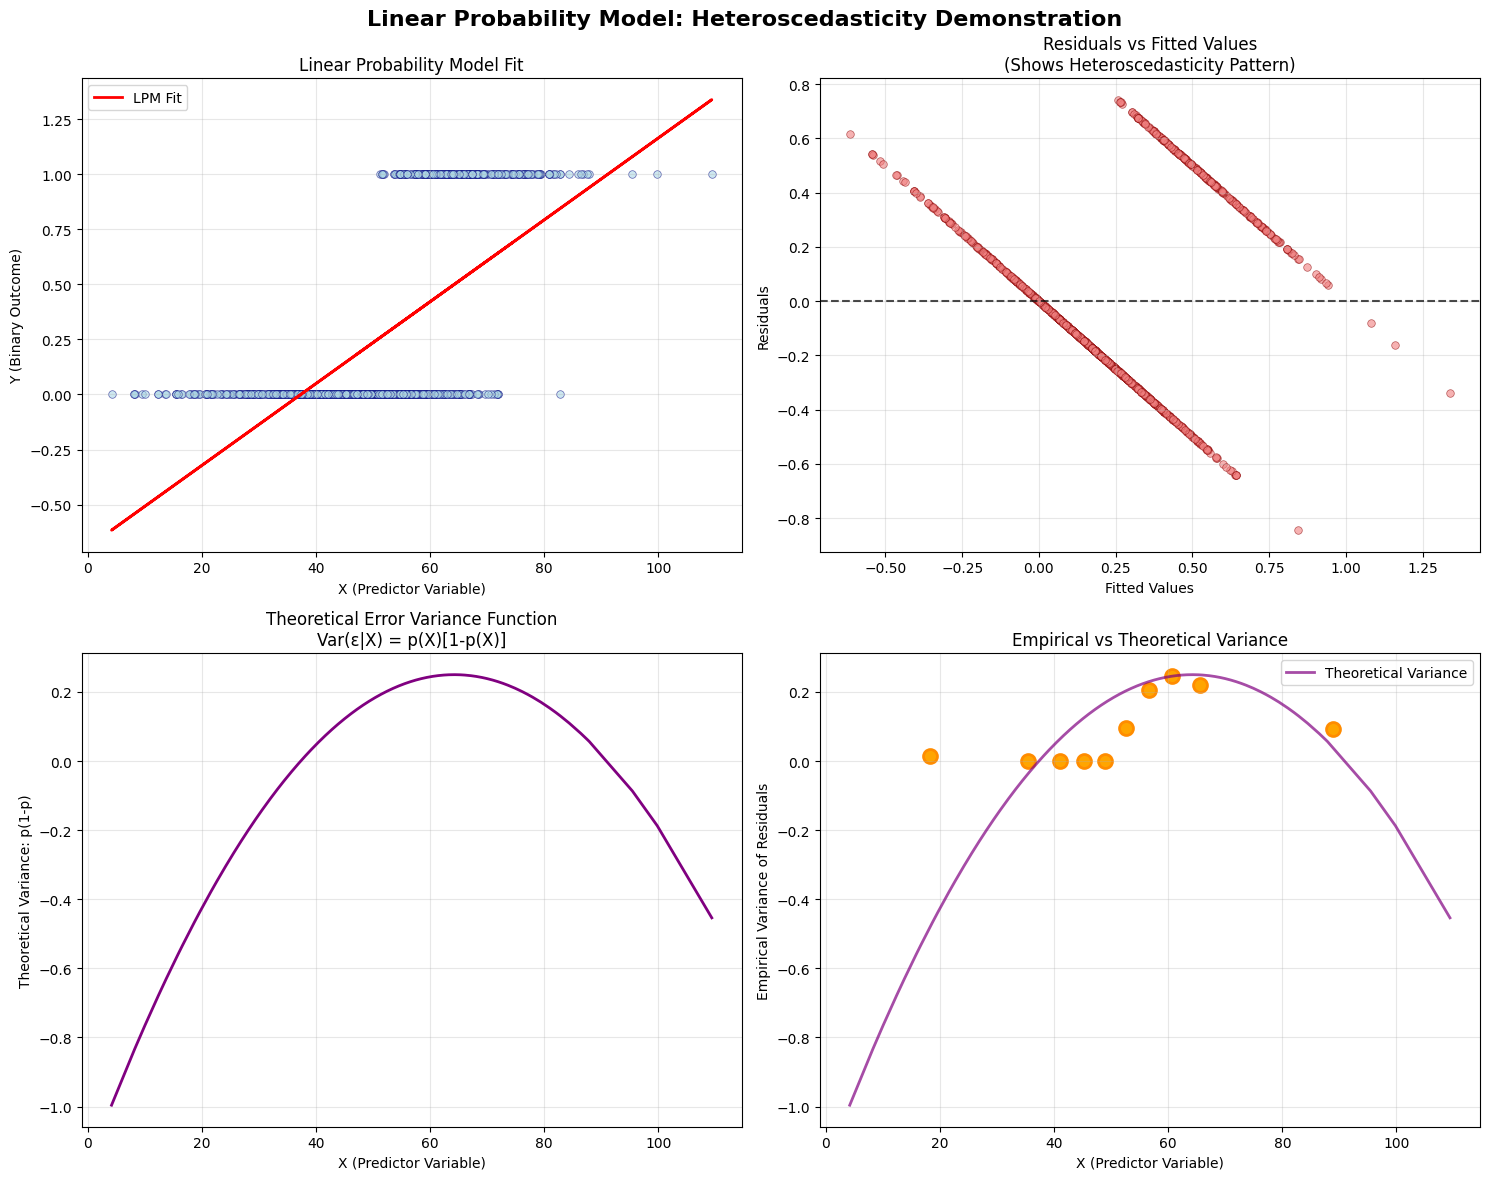


Consequences of Heteroscedasticity in LPM:
1. Standard errors are incorrect (usually understated)
2. t-tests and confidence intervals are invalid
3. Model efficiency is reduced
4. Predictions may be outside [0,1] range

Prediction Range Issues:
Minimum prediction: -0.6163
Maximum prediction: 1.3390
Predictions outside [0,1]: 180 (18.0%)

Solutions:
• Use logistic regression instead
• Apply robust standard errors (White's correction)
• Use weighted least squares
• Transform the model specification


In [12]:
# Set random seed for reproducibility
np.random.seed(1)

def simulate_lpm_heteroscedasticity(n_samples=1000):
    """
    Simulate data to demonstrate heteroscedasticity in Linear Probability Models
    """
    # Generate predictor variable (e.g., income, test scores, etc.)
    X = np.random.normal(50, 15, n_samples)
    
    # Create underlying linear relationship for probability
    # P(Y=1|X) = β0 + β1*X, but constrained between 0 and 1
    beta_0 = -2.0
    beta_1 = 0.04
    
    # Calculate probabilities using the linear model
    linear_pred = beta_0 + beta_1 * X
    probabilities = np.clip(linear_pred, 0.01, 0.99)  # Clip to avoid 0/1 probabilities
    
    # Generate binary outcomes based on these probabilities
    Y = np.random.binomial(1, probabilities, n_samples)
    
    return X, Y, probabilities, linear_pred

def calculate_residuals_and_variance(X, Y):
    """
    Calculate residuals and their variance for different ranges of X
    """
    # Fit Linear Probability Model
    X_reshaped = X.reshape(-1, 1)
    lpm = LinearRegression()
    lpm.fit(X_reshaped, Y)
    
    # Get predictions and residuals
    Y_pred = lpm.predict(X_reshaped)
    residuals = Y - Y_pred
    
    # Calculate theoretical variance: Var(ε) = p(1-p)
    theoretical_variance = Y_pred * (1 - Y_pred)
    
    return Y_pred, residuals, theoretical_variance, lpm

def plot_heteroscedasticity_demonstration(X, Y, Y_pred, residuals, theoretical_variance):
    """
    Create comprehensive plots showing heteroscedasticity in LPM
    """
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('Linear Probability Model: Heteroscedasticity Demonstration', fontsize=16, fontweight='bold')
    
    # Plot 1: Scatter plot with LPM fit
    axes[0, 0].scatter(X, Y, alpha=0.6, s=30, color='lightblue', edgecolor='navy', linewidth=0.5)
    axes[0, 0].plot(X, Y_pred, color='red', linewidth=2, label='LPM Fit')
    axes[0, 0].set_xlabel('X (Predictor Variable)')
    axes[0, 0].set_ylabel('Y (Binary Outcome)')
    axes[0, 0].set_title('Linear Probability Model Fit')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)
    
    # Plot 2: Residuals vs Fitted Values
    axes[0, 1].scatter(Y_pred, residuals, alpha=0.6, s=30, color='lightcoral', edgecolor='darkred', linewidth=0.5)
    axes[0, 1].axhline(y=0, color='black', linestyle='--', alpha=0.7)
    axes[0, 1].set_xlabel('Fitted Values')
    axes[0, 1].set_ylabel('Residuals')
    axes[0, 1].set_title('Residuals vs Fitted Values\n(Shows Heteroscedasticity Pattern)')
    axes[0, 1].grid(True, alpha=0.3)
    
    # Plot 3: Theoretical Variance Function
    X_sorted = np.sort(X)
    X_sorted_reshaped = X_sorted.reshape(-1, 1)
    Y_pred_sorted = LinearRegression().fit(X.reshape(-1, 1), Y).predict(X_sorted_reshaped)
    theoretical_var_sorted = Y_pred_sorted * (1 - Y_pred_sorted)
    
    axes[1, 0].plot(X_sorted, theoretical_var_sorted, color='purple', linewidth=2)
    axes[1, 0].set_xlabel('X (Predictor Variable)')
    axes[1, 0].set_ylabel('Theoretical Variance: p(1-p)')
    axes[1, 0].set_title('Theoretical Error Variance Function\nVar(ε|X) = p(X)[1-p(X)]')
    axes[1, 0].grid(True, alpha=0.3)
    
    # Plot 4: Empirical variance by bins
    n_bins = 10
    bins = np.percentile(X, np.linspace(0, 100, n_bins + 1))
    bin_centers = []
    empirical_vars = []
    
    for i in range(n_bins):
        mask = (X >= bins[i]) & (X < bins[i + 1])
        if np.sum(mask) > 5:  # Ensure enough observations
            bin_centers.append((bins[i] + bins[i + 1]) / 2)
            empirical_vars.append(np.var(residuals[mask]))
    
    axes[1, 1].scatter(bin_centers, empirical_vars, s=100, color='orange', edgecolor='darkorange', linewidth=2)
    axes[1, 1].plot(X_sorted, theoretical_var_sorted, color='purple', linewidth=2, alpha=0.7, label='Theoretical Variance')
    axes[1, 1].set_xlabel('X (Predictor Variable)')
    axes[1, 1].set_ylabel('Empirical Variance of Residuals')
    axes[1, 1].set_title('Empirical vs Theoretical Variance')
    axes[1, 1].legend()
    axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

def breusch_pagan_test(X, residuals):
    """
    Perform Breusch-Pagan test for heteroscedasticity
    """
    # Auxiliary regression: squared residuals on X
    X_reshaped = X.reshape(-1, 1)
    X_with_intercept = np.column_stack([np.ones(len(X)), X])
    
    # Regress squared residuals on X
    aux_reg = LinearRegression()
    aux_reg.fit(X_reshaped, residuals**2)
    
    # Calculate R-squared from auxiliary regression
    ss_res = np.sum((residuals**2 - aux_reg.predict(X_reshaped))**2)
    ss_tot = np.sum((residuals**2 - np.mean(residuals**2))**2)
    r_squared = 1 - (ss_res / ss_tot)
    
    # LM statistic = n * R²
    n = len(X)
    lm_statistic = n * r_squared
    
    # Under H0, LM ~ χ²(1)
    p_value = 1 - stats.chi2.cdf(lm_statistic, df=1)
    
    return lm_statistic, p_value

# Run the simulation
print("="*60)
print("LINEAR PROBABILITY MODEL HETEROSCEDASTICITY SIMULATION")
print("="*60)

# Generate data
X, Y, true_probabilities, linear_pred = simulate_lpm_heteroscedasticity(1000)

# Fit LPM and calculate residuals
Y_pred, residuals, theoretical_variance, lpm_model = calculate_residuals_and_variance(X, Y)

# Display model results
print(f"\nLinear Probability Model Results:")
print(f"Intercept (β₀): {lpm_model.intercept_:.4f}")
print(f"Slope (β₁): {lpm_model.coef_[0]:.4f}")
print(f"R²: {lpm_model.score(X.reshape(-1, 1), Y):.4f}")

# Test for heteroscedasticity
lm_stat, p_val = breusch_pagan_test(X, residuals)
print(f"\nBreusch-Pagan Test for Heteroscedasticity:")
print(f"LM Statistic: {lm_stat:.4f}")
print(f"P-value: {p_val:.4f}")
print(f"Conclusion: {'Heteroscedasticity detected' if p_val < 0.05 else 'No heteroscedasticity detected'}")

# Calculate variance statistics
min_variance = np.min(theoretical_variance)
max_variance = np.max(theoretical_variance)
print(f"\nVariance Analysis:")
print(f"Minimum theoretical variance: {min_variance:.4f}")
print(f"Maximum theoretical variance: {max_variance:.4f}")
print(f"Variance ratio (max/min): {max_variance/min_variance:.2f}")

# Show why heteroscedasticity occurs
print(f"\nWhy LPM suffers from heteroscedasticity:")
print(f"• Error variance = p(X)[1-p(X)]")
print(f"• When p(X) ≈ 0 or p(X) ≈ 1, variance is low")
print(f"• When p(X) ≈ 0.5, variance is maximum (0.25)")
print(f"• This creates a predictable pattern of changing variance")

# Create visualizations
plot_heteroscedasticity_demonstration(X, Y, Y_pred, residuals, theoretical_variance)

# Demonstrate consequences
print(f"\nConsequences of Heteroscedasticity in LPM:")
print(f"1. Standard errors are incorrect (usually understated)")
print(f"2. t-tests and confidence intervals are invalid") 
print(f"3. Model efficiency is reduced")
print(f"4. Predictions may be outside [0,1] range")

# Show prediction range issues
print(f"\nPrediction Range Issues:")
print(f"Minimum prediction: {np.min(Y_pred):.4f}")
print(f"Maximum prediction: {np.max(Y_pred):.4f}")
invalid_predictions = np.sum((Y_pred < 0) | (Y_pred > 1))
print(f"Predictions outside [0,1]: {invalid_predictions} ({100*invalid_predictions/len(Y_pred):.1f}%)")

print(f"\nSolutions:")
print(f"• Use logistic regression instead")
print(f"• Apply robust standard errors (White's correction)")  
print(f"• Use weighted least squares")
print(f"• Transform the model specification")

<h2>Break Down</h2>
<p>Plot 1 is interesting because from an intuitive perspective we are basically trying to fit a straight line on two outcomes(binary dependent variable). This doesn't make sense when our target variable has a binary outcome because we can't say ".7yes", or ".8no." It is either yes or no, and there isn't an inbetween when our target variable in binary.</p>
<p>Plot 2 was a little trickier for me because usually the residuals vs fitted values plot has a fan like shape. However, since we are dealing with binary dependent variables we got two parallel negatively sloped lines. They represent the binary nature of our target and this still shows heteroscedasticity due to the variance not being constant as X increases. </p>
<p>We get an arch shaped plot due to the formula p x (1 - p). Basically the more unsure we are with our binary answer, uncertainty is at its highest and then vice versa for lowest if we're confident. This shows that error variance is not constant and another reason why linear probability models suffer from heteroscedasticity.</p>
<p>This plot with the arch and orange dots are confirming that our data is in fact following that arch pattern which we displayed in plot 3. So we now for sure that there is heteroscedasticity in this model.</p>

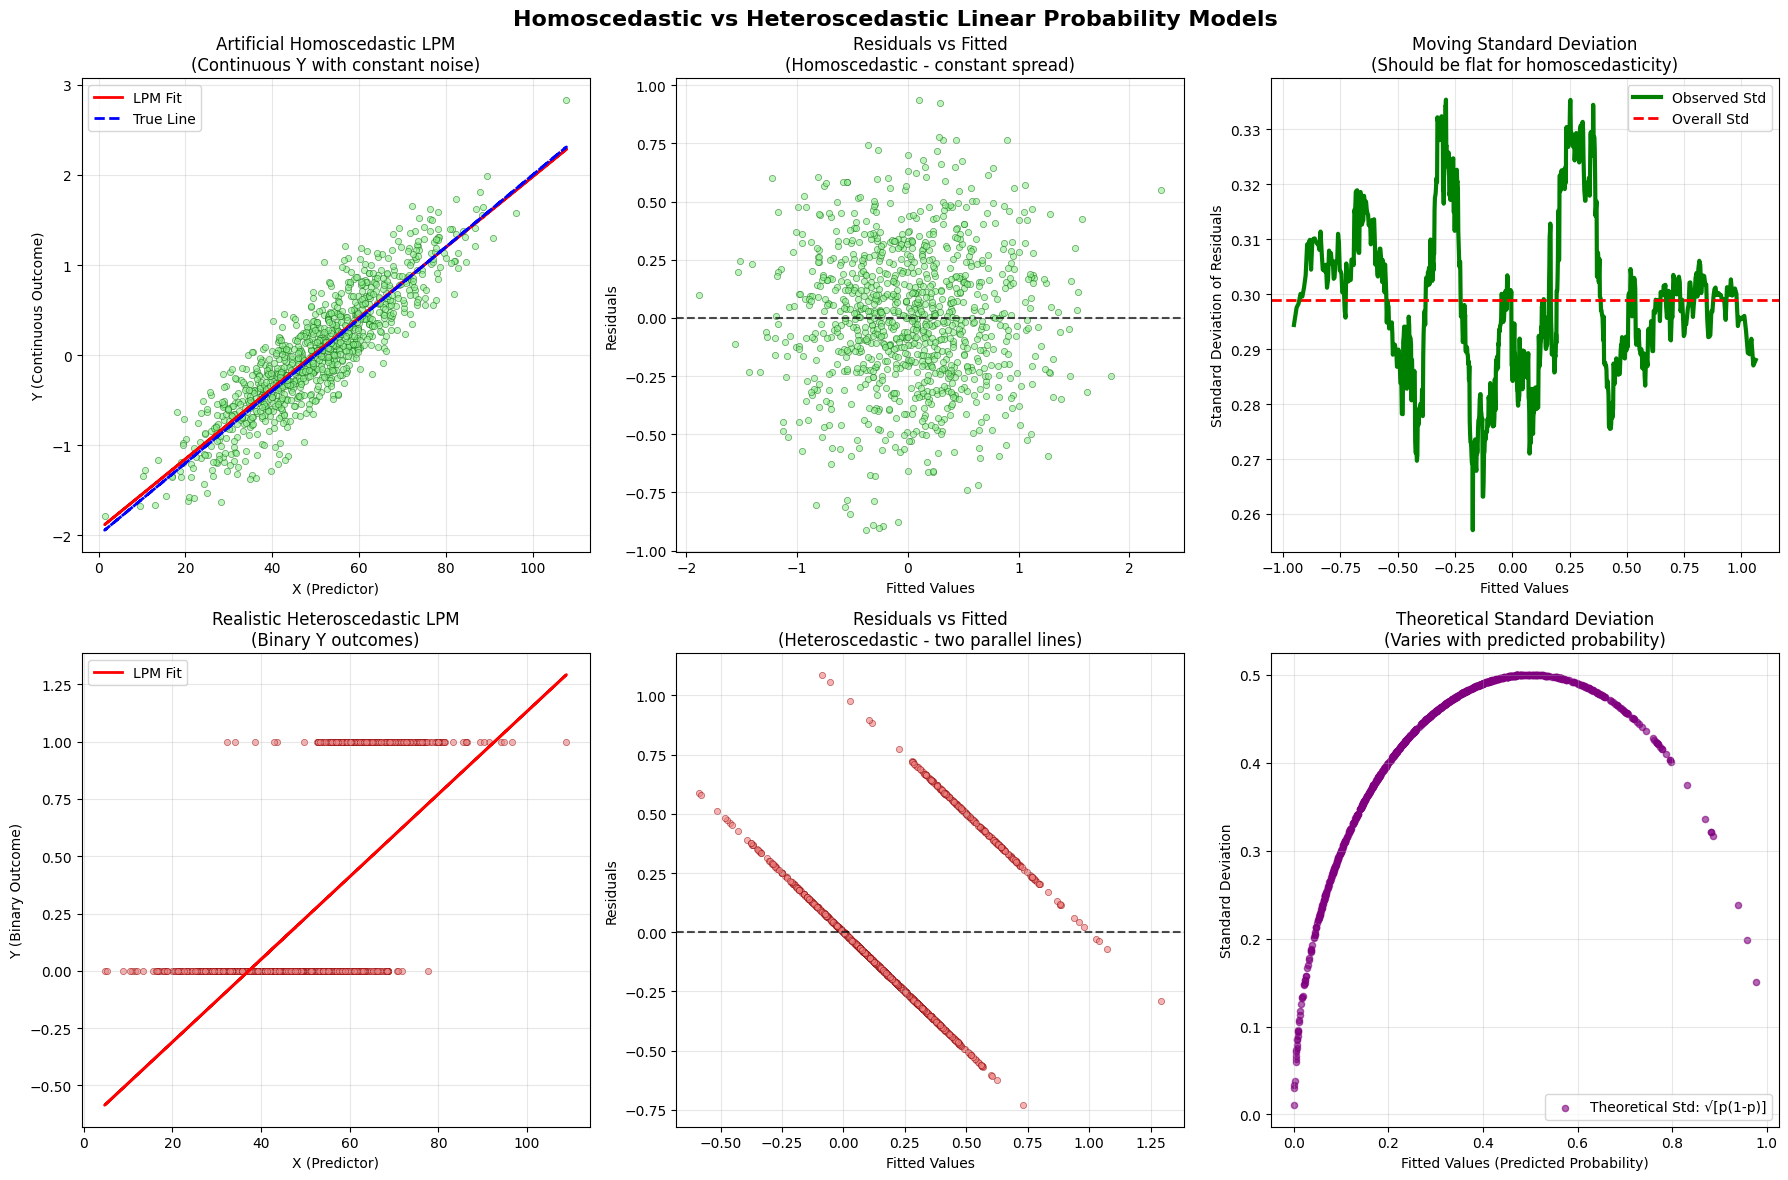

HOMOSCEDASTIC vs HETEROSCEDASTIC LPM COMPARISON

ARTIFICIAL HOMOSCEDASTIC MODEL (Top Row):
• Uses continuous Y with constant noise
• Residual standard deviation: 0.299
• Variance of residuals: 0.089
• R²: 0.787

REALISTIC HETEROSCEDASTIC MODEL (Bottom Row):
• Uses binary Y outcomes (0 or 1)
• Residual standard deviation: 0.328
• Variance of residuals: 0.107
• R²: 0.397

KEY DIFFERENCES:
1. RESIDUAL PATTERNS:
   • Homoscedastic: Random cloud around zero
   • Heteroscedastic: Two parallel diagonal lines

2. VARIANCE BEHAVIOR:
   • Homoscedastic: Constant variance across all fitted values
   • Heteroscedastic: Variance = p(1-p), maximum at p=0.5

3. REALISM:
   • Homoscedastic: IMPOSSIBLE with true binary outcomes
   • Heteroscedastic: INEVITABLE with binary outcomes

WHY HOMOSCEDASTICITY IS IMPOSSIBLE WITH BINARY DATA:
• Binary outcomes can only be 0 or 1
• Variance is mathematically determined by the probability: Var = p(1-p)
• You cannot have constant variance with binary data
• The to

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Set random seed for reproducibility
np.random.seed(42)

def create_artificial_homoscedastic_lpm(n_samples=1000):
    """
    Create an artificially homoscedastic version of LPM by adding constant variance noise
    This is NOT realistic but shows what homoscedasticity would look like
    """
    # Generate predictor variable
    X = np.random.normal(50, 15, n_samples)
    
    # Create true linear relationship
    beta_0 = -2.0
    beta_1 = 0.04
    true_linear = beta_0 + beta_1 * X
    
    # Add CONSTANT variance noise instead of binary outcomes
    # This violates the binary nature but creates homoscedasticity
    constant_noise_std = 0.3  # Same noise level for all X values
    Y_continuous = true_linear + np.random.normal(0, constant_noise_std, n_samples)
    
    return X, Y_continuous, true_linear

def create_realistic_heteroscedastic_lpm(n_samples=1000):
    """
    Create the realistic heteroscedastic LPM with binary outcomes
    """
    # Generate predictor variable
    X = np.random.normal(50, 15, n_samples)
    
    # Create underlying probabilities
    beta_0 = -2.0
    beta_1 = 0.04
    linear_pred = beta_0 + beta_1 * X
    probabilities = np.clip(linear_pred, 0.01, 0.99)
    
    # Generate binary outcomes
    Y_binary = np.random.binomial(1, probabilities, n_samples)
    
    return X, Y_binary, probabilities

# Generate both datasets
X, Y_homo, true_linear = create_artificial_homoscedastic_lpm(1000)
X_hetero, Y_hetero, probs = create_realistic_heteroscedastic_lpm(1000)

# Fit models
lm_homo = LinearRegression().fit(X.reshape(-1, 1), Y_homo)
lm_hetero = LinearRegression().fit(X_hetero.reshape(-1, 1), Y_hetero)

# Get predictions and residuals
pred_homo = lm_homo.predict(X.reshape(-1, 1))
residuals_homo = Y_homo - pred_homo

pred_hetero = lm_hetero.predict(X_hetero.reshape(-1, 1))
residuals_hetero = Y_hetero - pred_hetero

# Create comparison plots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Homoscedastic vs Heteroscedastic Linear Probability Models', fontsize=16, fontweight='bold')

# Row 1: Artificial Homoscedastic LPM
axes[0, 0].scatter(X, Y_homo, alpha=0.6, s=20, color='lightgreen', edgecolor='darkgreen', linewidth=0.5)
axes[0, 0].plot(X, pred_homo, color='red', linewidth=2, label='LPM Fit')
axes[0, 0].plot(X, true_linear, color='blue', linewidth=2, linestyle='--', label='True Line')
axes[0, 0].set_xlabel('X (Predictor)')
axes[0, 0].set_ylabel('Y (Continuous Outcome)')
axes[0, 0].set_title('Artificial Homoscedastic LPM\n(Continuous Y with constant noise)')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].scatter(pred_homo, residuals_homo, alpha=0.6, s=20, color='lightgreen', edgecolor='darkgreen', linewidth=0.5)
axes[0, 1].axhline(y=0, color='black', linestyle='--', alpha=0.7)
axes[0, 1].set_xlabel('Fitted Values')
axes[0, 1].set_ylabel('Residuals')
axes[0, 1].set_title('Residuals vs Fitted\n(Homoscedastic - constant spread)')
axes[0, 1].grid(True, alpha=0.3)

# Calculate moving standard deviation for homoscedastic case
sorted_indices_homo = np.argsort(pred_homo)
window_size = 100
moving_std_homo = []
moving_fitted_homo = []

for i in range(len(sorted_indices_homo) - window_size):
    window_residuals = residuals_homo[sorted_indices_homo[i:i+window_size]]
    window_fitted = pred_homo[sorted_indices_homo[i:i+window_size]]
    moving_std_homo.append(np.std(window_residuals))
    moving_fitted_homo.append(np.mean(window_fitted))

axes[0, 2].plot(moving_fitted_homo, moving_std_homo, color='green', linewidth=3, label='Observed Std')
axes[0, 2].axhline(y=np.std(residuals_homo), color='red', linestyle='--', linewidth=2, label='Overall Std')
axes[0, 2].set_xlabel('Fitted Values')
axes[0, 2].set_ylabel('Standard Deviation of Residuals')
axes[0, 2].set_title('Moving Standard Deviation\n(Should be flat for homoscedasticity)')
axes[0, 2].legend()
axes[0, 2].grid(True, alpha=0.3)

# Row 2: Realistic Heteroscedastic LPM
axes[1, 0].scatter(X_hetero, Y_hetero, alpha=0.6, s=20, color='lightcoral', edgecolor='darkred', linewidth=0.5)
axes[1, 0].plot(X_hetero, pred_hetero, color='red', linewidth=2, label='LPM Fit')
axes[1, 0].set_xlabel('X (Predictor)')
axes[1, 0].set_ylabel('Y (Binary Outcome)')
axes[1, 0].set_title('Realistic Heteroscedastic LPM\n(Binary Y outcomes)')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

axes[1, 1].scatter(pred_hetero, residuals_hetero, alpha=0.6, s=20, color='lightcoral', edgecolor='darkred', linewidth=0.5)
axes[1, 1].axhline(y=0, color='black', linestyle='--', alpha=0.7)
axes[1, 1].set_xlabel('Fitted Values')
axes[1, 1].set_ylabel('Residuals')
axes[1, 1].set_title('Residuals vs Fitted\n(Heteroscedastic - two parallel lines)')
axes[1, 1].grid(True, alpha=0.3)

# Calculate theoretical variance for heteroscedastic case
theoretical_std = np.sqrt(pred_hetero * (1 - pred_hetero))
axes[1, 2].scatter(pred_hetero, theoretical_std, alpha=0.6, s=20, color='purple', label='Theoretical Std: √[p(1-p)]')
axes[1, 2].set_xlabel('Fitted Values (Predicted Probability)')
axes[1, 2].set_ylabel('Standard Deviation')
axes[1, 2].set_title('Theoretical Standard Deviation\n(Varies with predicted probability)')
axes[1, 2].legend()
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print comparison statistics
print("="*80)
print("HOMOSCEDASTIC vs HETEROSCEDASTIC LPM COMPARISON")
print("="*80)

print(f"\nARTIFICIAL HOMOSCEDASTIC MODEL (Top Row):")
print(f"• Uses continuous Y with constant noise")
print(f"• Residual standard deviation: {np.std(residuals_homo):.3f}")
print(f"• Variance of residuals: {np.var(residuals_homo):.3f}")
print(f"• R²: {lm_homo.score(X.reshape(-1, 1), Y_homo):.3f}")

print(f"\nREALISTIC HETEROSCEDASTIC MODEL (Bottom Row):")
print(f"• Uses binary Y outcomes (0 or 1)")
print(f"• Residual standard deviation: {np.std(residuals_hetero):.3f}")
print(f"• Variance of residuals: {np.var(residuals_hetero):.3f}")
print(f"• R²: {lm_hetero.score(X_hetero.reshape(-1, 1), Y_hetero):.3f}")

print(f"\nKEY DIFFERENCES:")
print(f"1. RESIDUAL PATTERNS:")
print(f"   • Homoscedastic: Random cloud around zero")
print(f"   • Heteroscedastic: Two parallel diagonal lines")

print(f"\n2. VARIANCE BEHAVIOR:")
print(f"   • Homoscedastic: Constant variance across all fitted values")
print(f"   • Heteroscedastic: Variance = p(1-p), maximum at p=0.5")

print(f"\n3. REALISM:")
print(f"   • Homoscedastic: IMPOSSIBLE with true binary outcomes")
print(f"   • Heteroscedastic: INEVITABLE with binary outcomes")

print(f"\nWHY HOMOSCEDASTICITY IS IMPOSSIBLE WITH BINARY DATA:")
print(f"• Binary outcomes can only be 0 or 1")
print(f"• Variance is mathematically determined by the probability: Var = p(1-p)")
print(f"• You cannot have constant variance with binary data")
print(f"• The top row is artificial - real binary data MUST look like the bottom row")

print(f"\nIMPLICATIONS:")
print(f"• Standard OLS assumptions are violated with binary outcomes")
print(f"• Use logistic regression or robust standard errors instead")
print(f"• The homoscedastic version shown is just for educational purposes")

idk if i'll include the homoscedastic vs hetereoscedastic graphs in the submission. Just a cool visual to help drive home linear probability models suffer from heteroscedasticity.